In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [170]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Считывание данных

file_path = 'data.xlsx'
df = pd.read_excel(file_path)
print(df.head())

   client_id      sum      status     sale new/current  Unnamed: 5  document  \
0        NaN      NaN    Май 2021      NaN         NaN         NaN       NaN   
1        6.0  11693.7  ВНУТРЕННИЙ        -           -         NaN         -   
2       14.0   5452.7    ОПЛАЧЕНО  Петрова       новая         NaN  оригинал   
3       15.0  13991.7    ОПЛАЧЕНО   Иванов     текущая         NaN  оригинал   
4       16.0    719.7    ОПЛАЧЕНО   Иванов     текущая         NaN  оригинал   

        receiving_date  
0                  NaN  
1                    -  
2  2021-07-26 00:00:00  
3  2021-06-08 00:00:00  
4  2021-06-08 00:00:00  


In [4]:
print(df.dtypes)


client_id         float64
sum               float64
status             object
sale               object
new/current        object
Unnamed: 5        float64
document           object
receiving_date     object
dtype: object


In [5]:
# 2. Преобразование данных

df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce') # преобразовали тип данных
if 'Unnamed: 5' in df.columns:
    df.drop(columns=['Unnamed: 5'], inplace=True) # удалили пустую колонку
df['client_id'] = df['client_id'].astype('Int64')
df['status'] = df['status'].astype('str')
df['sale'] = df['sale'].astype('str')
df['sale'] = df['sale'].replace('', np.nan) 
df['new/current'] = df['new/current'].astype('str')
df['document'] = df['document'].astype('str')
df['client_id'] = df['client_id'].replace('', np.nan)
df = df.drop_duplicates() # удаляем строки-дубли

print(df.head())

   client_id      sum      status     sale new/current  document  \
0       <NA>      NaN    Май 2021      nan         nan       nan   
1          6  11693.7  ВНУТРЕННИЙ        -           -         -   
2         14   5452.7    ОПЛАЧЕНО  Петрова       новая  оригинал   
3         15  13991.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   
4         16    719.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   

  receiving_date  
0            NaT  
1            NaT  
2     2021-07-26  
3     2021-06-08  
4     2021-06-08  


C:\Users\HP\AppData\Local\Temp\ipykernel_2880\3839036753.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce') # преобразовали тип данных


In [8]:
df['date'] = df['status']
df.loc[df['client_id'].notna(), 'date'] = np.nan
df['date'] = df['date'].ffill()
print(df.head())

   client_id      sum      status     sale new/current  document  \
0       <NA>      NaN    Май 2021      nan         nan       nan   
1          6  11693.7  ВНУТРЕННИЙ        -           -         -   
2         14   5452.7    ОПЛАЧЕНО  Петрова       новая  оригинал   
3         15  13991.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   
4         16    719.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   

  receiving_date      date  
0            NaT  Май 2021  
1            NaT  Май 2021  
2     2021-07-26  Май 2021  
3     2021-06-08  Май 2021  
4     2021-06-08  Май 2021  


In [9]:
# 2. Преобразование данных

df['receiving_date'] = pd.to_datetime(df['receiving_date'], errors='coerce') # преобразовали тип данных
if 'Unnamed: 5' in df.columns:
    df.drop(columns=['Unnamed: 5'], inplace=True) # удалили пустую колонку
df['client_id'] = df['client_id'].astype('Int64')
df['status'] = df['status'].astype('str')
df['sale'] = df['sale'].astype('str')
df['sale'] = df['sale'].replace('', np.nan) 
df['new/current'] = df['new/current'].astype('str')
df['document'] = df['document'].astype('str')
df['client_id'] = df['client_id'].replace('', np.nan)
df = df.drop_duplicates() # удаляем строки-дубли
df = df.dropna(subset=['client_id']) # Избавляемся от личшних строк с месяцами в статусе
print(df.head())

   client_id      sum      status     sale new/current  document  \
1          6  11693.7  ВНУТРЕННИЙ        -           -         -   
2         14   5452.7    ОПЛАЧЕНО  Петрова       новая  оригинал   
3         15  13991.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   
4         16    719.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   
5         18   4253.7    ОПЛАЧЕНО   Иванов     текущая  оригинал   

  receiving_date      date  
1            NaT  Май 2021  
2     2021-07-26  Май 2021  
3     2021-06-08  Май 2021  
4     2021-06-08  Май 2021  
5     2021-07-07  Май 2021  


In [10]:
row_count = df.shape[0]
print(f"Количество строк: {row_count}")

Количество строк: 691


In [11]:
print(df.dtypes)

client_id                  Int64
sum                      float64
status                    object
sale                      object
new/current               object
document                  object
receiving_date    datetime64[ns]
date                      object
dtype: object


In [12]:
# 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

df_filtered = df[df['status'] != 'ПРОСРОЧЕНО'] # убираем строки со статусом ПРОСРОЧЕНО
df_july = df_filtered[df_filtered['date'] == 'Июль 2021'] # фильтруем по дате
total_revenue = df_july['sum'].sum() # считаем сумму по колонке sum
print(f"Общая выручка за июль 2021 по сделкам без просрочек: {total_revenue}")

Общая выручка за июль 2021 по сделкам без просрочек: 826622.6699999997


In [14]:
# 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

months_translation = {
    'Январь': 'January',
    'Февраль': 'February',
    'Март': 'March',
    'Апрель': 'April',
    'Май': 'May',
    'Июнь': 'June',
    'Июль': 'July',
    'Август': 'August',
    'Сентябрь': 'September',
    'Октябрь': 'October',
    'Ноябрь': 'November',
    'Декабрь': 'December'
}

def translate_month(month_year):
    for ru_month, en_month in months_translation.items():
        if ru_month in month_year:
            return month_year.replace(ru_month, en_month)
    return month_year

# Применяем функцию к столбцу
df_with_date = df
df_with_date['date'] = df_with_date['date'].apply(translate_month)
df_with_date['date'] = pd.to_datetime(df['date'], format='%B %Y') 

monthly_revenue_status = df_with_date.groupby(['date', 'status'])['sum'].sum().unstack().fillna(0) 
print(monthly_revenue_status)
# получаем данные о выручкем по месяцам в зависимости от статуса

status       В РАБОТЕ  ВНУТРЕННИЙ  НА ПОДПИСАНИИ   ОПЛАЧЕНО  ПРОСРОЧЕНО
date                                                                   
2021-05-01       0.00     11693.7           0.00  784273.69     8903.70
2021-06-01       0.00         0.0           0.00  771659.01     8823.70
2021-07-01       0.00         0.0           0.00  826622.67     1977.70
2021-08-01   14627.40         0.0           0.00  754440.79    64967.80
2021-09-01   58495.47         0.0           0.00  711220.31    36767.00
2021-10-01  223810.16         0.0       19366.61  407202.47   324458.15


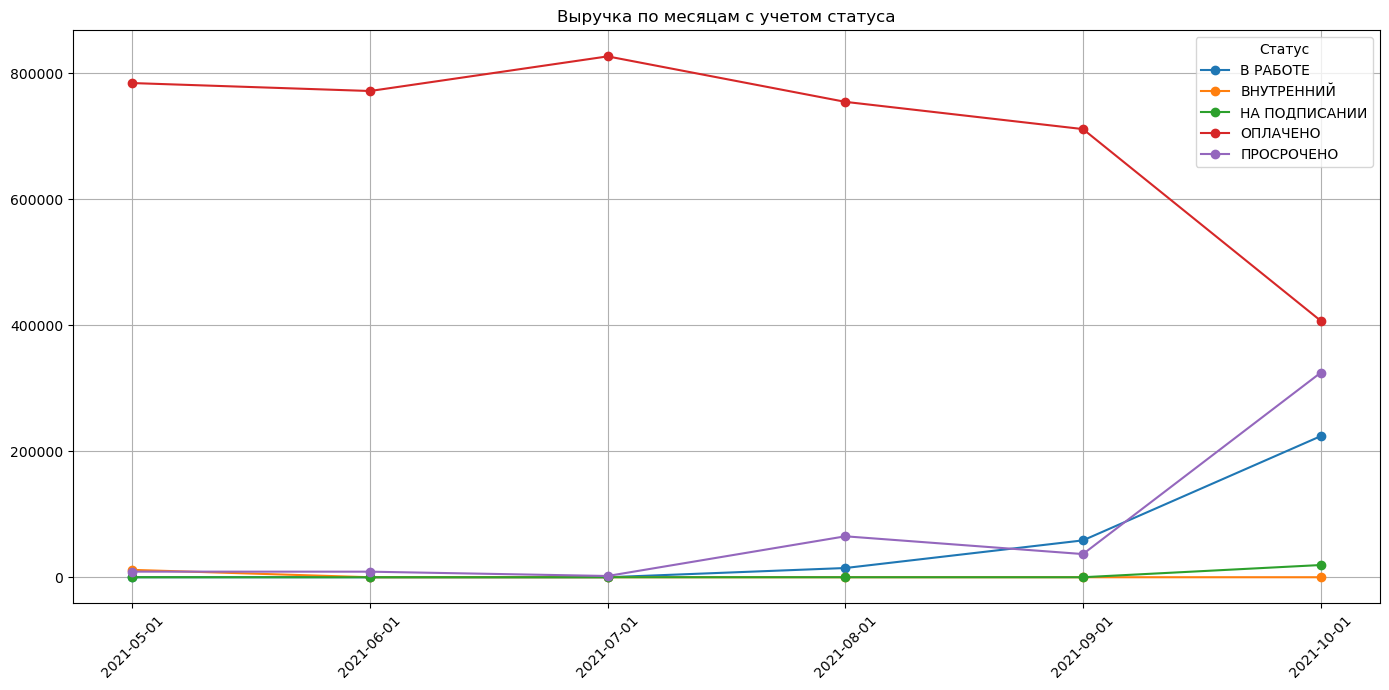

In [15]:
# Благодаря графику видим, что пиковое значение выручка достигла в июле, далее стала постепенно проседать

plt.figure(figsize=(14, 7))
for status in monthly_revenue_status.columns:
    plt.plot(monthly_revenue_status.index.astype(str), monthly_revenue_status[status], marker='o', label=status)
plt.title('Выручка по месяцам с учетом статуса')
plt.xticks(rotation=45)  
plt.legend(title='Статус')
plt.grid(True)  # Добавляем сетку для лучшего восприятия
plt.tight_layout() # Автоматическая корректировка расположения элементов


In [24]:
# 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

df_september = df[(df['date'] == '2021-09') & (df['status'] == 'ОПЛАЧЕНО')]
manager_revenue = df_september.groupby('sale')['sum'].sum()

top_manager = manager_revenue.idxmax()
top_revenue = manager_revenue.max()
print(f"Рекордсменом по привлечению денежных средств за сентябрь 2021г стал(а): {top_manager}, с суммой оплаченных сделок: {top_revenue}")

Рекордсменом по привлечению денежных средств за сентябрь 2021г стал(а): Смирнов, с суммой оплаченных сделок: 195817.2


In [25]:
# 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

df_october = df[df['date'] == '2021-10']
deal_counts = df_october['new/current'].value_counts()
top_deal_type = deal_counts.idxmax()
print(deal_counts)
print(f"Преобладающим типом сделок за октябрь 2021 является: {top_deal_type}")

new/current
текущая    95
новая      35
Name: count, dtype: int64
Преобладающим типом сделок за октябрь 2021 является: текущая


In [ ]:
# 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

df_june = df[(df['date'] == '2021-05') & (df['receiving_date'].dt.month == 6) & (df['receiving_date'].dt.year == 2021)]
originals_count = df_june[df_june['document'] == 'оригинал'].shape[0]

print(f"Общее количество оригиналов договора по майским сделкам: {originals_count}") 

In [34]:
print(df)

     client_id      sum      status        sale new/current  document  \
1            6  11693.7  ВНУТРЕННИЙ           -           -         -   
2           14   5452.7    ОПЛАЧЕНО     Петрова       новая  оригинал   
3           15  13991.7    ОПЛАЧЕНО      Иванов     текущая  оригинал   
4           16    719.7    ОПЛАЧЕНО      Иванов     текущая  оригинал   
5           18   4253.7    ОПЛАЧЕНО      Иванов     текущая  оригинал   
..         ...      ...         ...         ...         ...       ...   
725        285   4328.7    ОПЛАЧЕНО    Васильев     текущая  оригинал   
726        360   3096.2    ОПЛАЧЕНО    Васильев       новая       НЕТ   
727        360   3096.2  ПРОСРОЧЕНО    Васильев       новая       НЕТ   
728        373   4403.7    ОПЛАЧЕНО    Михайлов       новая  оригинал   
729        286   3978.7    ОПЛАЧЕНО  Филимонова     текущая  оригинал   

    receiving_date       date  
1              NaT 2021-05-01  
2       2021-07-26 2021-05-01  
3       2021-06-08 2021-05-

In [ ]:
# За каждую заключенную сделку менеджер получает бонус, который рассчитывается следующим образом.
# 1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
# клиентом (в рассматриваемом месяце).
# 2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс,и 3 % от суммы, если меньше. При этом статус оплаты может быть любым
# кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).
# Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, 
# который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [46]:
# Бонусы, заработанные за июнь

df_june_deal = df[(df['receiving_date'].dt.month == 6) & (df['receiving_date'].dt.year == 2021)] 

def calculate_bonus(row):
    bonus = 0
    if row['new/current'] == 'новая' and row['status'] == 'ОПЛАЧЕНО' and row['document'] == 'оригинал':
        bonus = row['sum'] * 0.07
    elif row['new/current'] == 'текущая'  and row['status'] != 'ПРОСРОЧЕНО' and row['document'] == 'оригинал':
        if row['sum'] > 10000:
                bonus = row['sum'] * 0.05
        else:
                bonus = row['sum'] * 0.03
    return bonus

df_june_deal['bonus'] = df_june_deal.apply(calculate_bonus, axis=1)
# Группируем по менеджерам и суммируем бонусы
bonus_summary = df_june_deal.groupby('sale')['bonus'].sum().reset_index()

display(bonus_summary)

C:\Users\HP\AppData\Local\Temp\ipykernel_2880\1728570587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june_deal['bonus'] = df_june_deal.apply(calculate_bonus, axis=1)


,sale,bonus
0,Андреев,2962.1717
1,Васильев,339.2310
2,Иванов,2503.8390
3,Кузнецова,2604.6716
4,Петрова,7028.8020
5,Селиванов,353.3220
6,Смирнов,4078.7240
7,Филимонова,306.0720
